In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
weather = pd.read_csv('/Users/ridhampatel/Documents/Python/Datasets/weather.csv')

In [4]:
weather.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


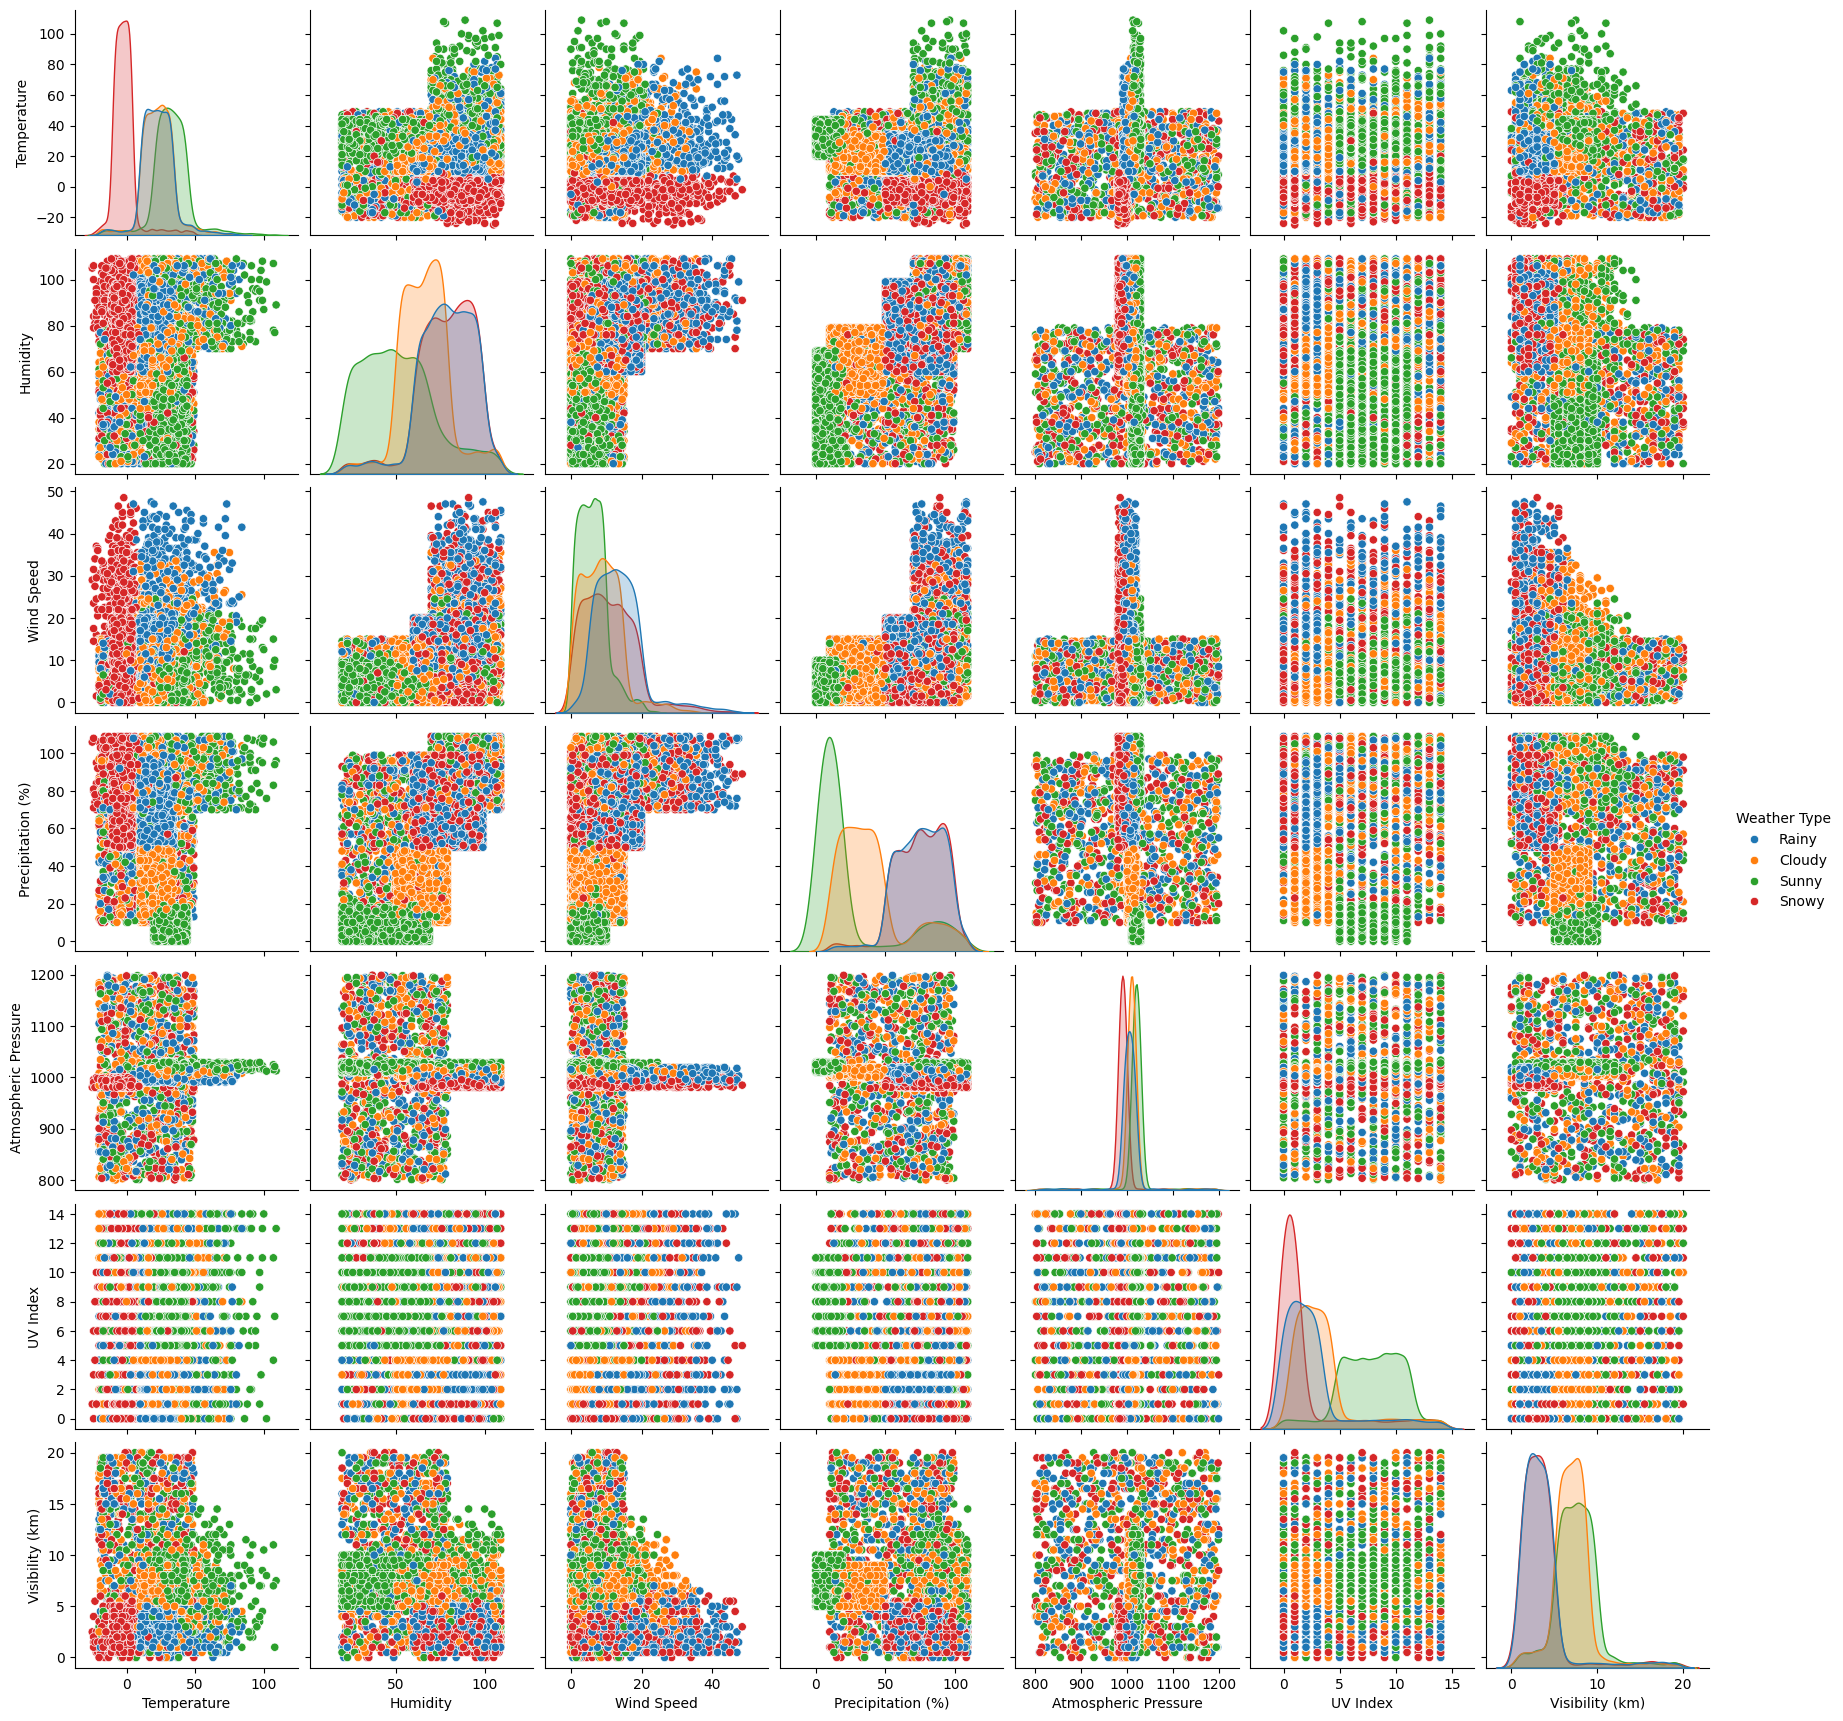

In [9]:
sns.pairplot(weather,hue='Weather Type')

In [6]:
weather.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [8]:
final_data = pd.get_dummies(weather,columns=['Cloud Cover','Season','Location'],drop_first=True)
final_data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,False,False,True,False,False,True,True,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy,False,False,True,True,False,False,True,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,False,False,False,True,False,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,False,False,False,True,False,False,False,False
4,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,False,True,False,False,False,True,False,True


In [11]:
y = final_data['Weather Type']
X = final_data.drop('Weather Type',axis=1)

In [13]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.svm import SVC

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [20]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.254 total time=   1.8s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.254 total time=   1.8s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.254 total time=   1.8s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.254 total time=   1.8s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.254 total time=   1.8s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.254 total time=   1.7s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.254 total time=   1.7s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.254 total time=   1.7s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.254 total time=   1.7s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.254 total time=   1.7s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.850 total time=   0.8s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [21]:
grid_predictions = grid.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 944   65   17   28]
 [  68  978   17   15]
 [  24   29 1055   16]
 [  65   35   25  975]]
              precision    recall  f1-score   support

      Cloudy       0.86      0.90      0.88      1054
       Rainy       0.88      0.91      0.90      1078
       Snowy       0.95      0.94      0.94      1124
       Sunny       0.94      0.89      0.91      1100

    accuracy                           0.91      4356
   macro avg       0.91      0.91      0.91      4356
weighted avg       0.91      0.91      0.91      4356

